<a href="https://colab.research.google.com/github/JoaquinGonzalezSimon/Data_science_and_ML_from_Medium/blob/main/230523_Microsoft_Price_Prediction_with_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### This project was taken from the following link

https://thecleverprogrammer.com/2021/06/21/microsoft-stock-price-prediction-with-machine-learning/

In [1]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [18]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

import yfinance as yf

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [9]:
sns.set()
plt.style.use('fivethirtyeight')

In [3]:
ticker = 'MSFT'

In [5]:
data = yf.download(ticker, interval = '1d', period='5y', progress=True)

[*********************100%***********************]  1 of 1 completed


In [6]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-05-24,98.730003,98.940002,96.809998,98.309998,92.981392,26649300
2018-05-25,98.300003,98.980003,97.860001,98.360001,93.028671,18363900
2018-05-29,97.839996,98.879997,97.230003,98.010002,92.697639,28671000
2018-05-30,98.309998,99.250000,97.910004,98.949997,93.586700,22158500
2018-05-31,99.290001,99.989998,98.610001,98.839996,93.482651,34140900


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2018-05-24 to 2023-05-23
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1258 non-null   float64
 1   High       1258 non-null   float64
 2   Low        1258 non-null   float64
 3   Close      1258 non-null   float64
 4   Adj Close  1258 non-null   float64
 5   Volume     1258 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 68.8 KB


In [8]:
data = data.reset_index(drop=False)
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-05-24,98.730003,98.940002,96.809998,98.309998,92.981392,26649300
1,2018-05-25,98.300003,98.980003,97.860001,98.360001,93.028671,18363900
2,2018-05-29,97.839996,98.879997,97.230003,98.010002,92.697639,28671000
3,2018-05-30,98.309998,99.250000,97.910004,98.949997,93.586700,22158500
4,2018-05-31,99.290001,99.989998,98.610001,98.839996,93.482651,34140900


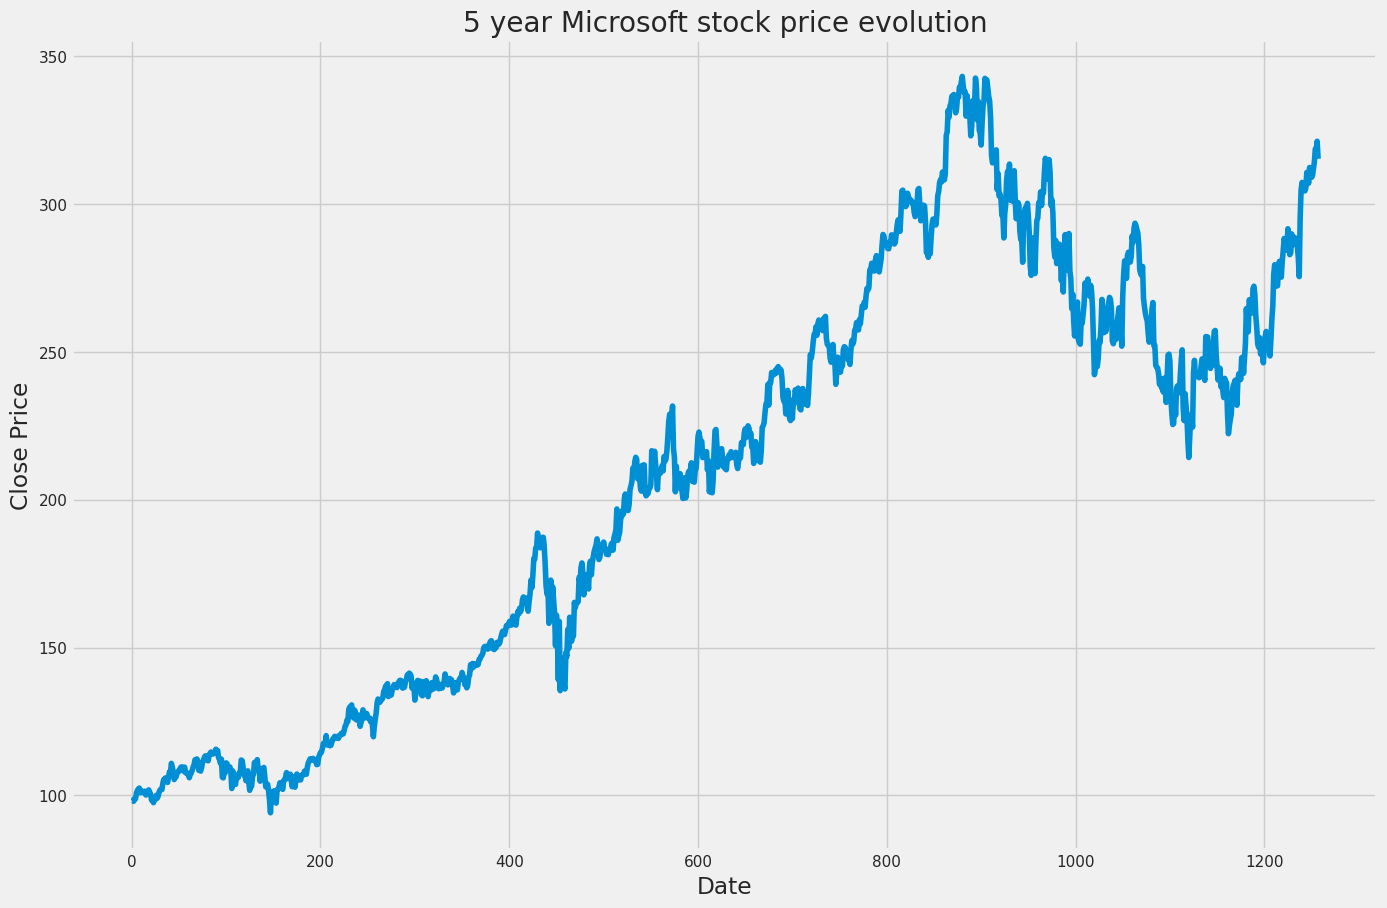

In [10]:
plt.figure(figsize=(15,10))
plt.title('5 year Microsoft stock price evolution')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.plot(data.Close)
plt.show()

In [11]:
data.corr()

<ipython-input-11-c44ded798807>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999574,0.999528,0.998974,0.998819,-0.058813
High,0.999574,1.000000,0.999373,0.999488,0.999394,-0.047379
Low,0.999528,0.999373,1.000000,0.999515,0.999312,-0.072177
Close,0.998974,0.999488,0.999515,1.000000,0.999835,-0.061228
Adj Close,0.998819,0.999394,0.999312,0.999835,1.000000,-0.060285
Volume,-0.058813,-0.047379,-0.072177,-0.061228,-0.060285,1.000000


<ipython-input-17-41dfa36d046c>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



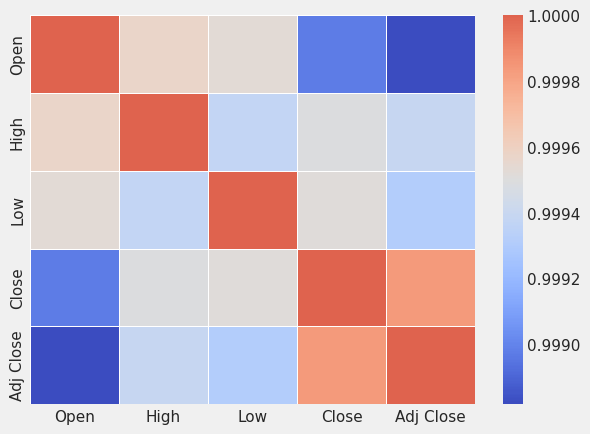

In [17]:
sns.heatmap(data.drop('Volume',axis=1).corr(), linewidths=0.5, cmap='coolwarm', center=0.9995)
plt.show()

In [19]:
x = np.array(data[['Open', 'High', 'Low']])
y = np.array(data[['Close']])
y.shape

(1258, 1)

In [20]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.20)
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((1006, 3), (252, 3), (1006, 1), (252, 1))

In [21]:
model = DecisionTreeRegressor()
model.fit(xtrain, ytrain)

DecisionTreeRegressor()

In [22]:
ypred = model.predict(xtest)
df = pd.DataFrame(data={'Predicted Rate': ypred})
df.head()

,Predicted Rate
0,250.789993
1,222.589996
2,314.000000
3,150.619995
4,285.760010


In [24]:
model.score(xtest, ypred)

1.0